#2110443 - Computer Vision (2020/2)

#Lab 9 - Modern Object Detection 
In this lab, we will learn how to use Convolutional Neural Network on object detection problem by using famouse object detection framework <a href="https://github.com/open-mmlab/mmdetection">MMDetection</a>. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Install prerequisite libraries for MMDetection
![mmdetection](https://raw.githubusercontent.com/open-mmlab/mmdetection/master/resources/mmdet-logo.png)

In [1]:
!pip uninstall -y torch torchvision torchtext torchaudio pycocotools # prebuilt mmdetection require PyTorch 1.7.0
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==1.2.7 -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html
!pip install mmdet==2.10.0
!pip install mmpycocotools

Found existing installation: torch 1.7.0+cu110
Uninstalling torch-1.7.0+cu110:
  Successfully uninstalled torch-1.7.0+cu110
Found existing installation: torchvision 0.8.1+cu110
Uninstalling torchvision-0.8.1+cu110:
  Successfully uninstalled torchvision-0.8.1+cu110
Found existing installation: torchaudio 0.7.0
Uninstalling torchaudio-0.7.0:
  Successfully uninstalled torchaudio-0.7.0
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu110/torch-1.7.0%2Bcu110-cp37-cp37m-linux_x86_64.whl (1137.1 MB)
  Using cached https://download.pytorch.org/whl/cu110/torchvision-0.8.1%2Bcu110-cp37-cp37m-linux_x86_64.whl (12.9 MB)
  Using cached torchaudio-0.7.0-cp37-cp37m-manylinux1_x86_64.whl (7.6 MB)
Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html


In [ ]:
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git

# %cd mmdetection
# !git checkout tags/v2.10.0
# # %cd /content

## MMDetection pretrained model (MaskRCNN)

In [2]:
import mmcv
import numpy as np

In [2]:
# !mkdir checkpoints
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
#       -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-03-27 16:32:15--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.85
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  18.8MB/s    in 8.9s    

2021-03-27 16:32:24 (19.0 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [4]:
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/detectors/detectors_htc_r50_1x_coco/detectors_htc_r50_1x_coco-329b1453.pth \
#     -o checkpoints/detectors_htc_r50_1x_coco-329b1453.pth

In [18]:
!ls checkpoints

detectors_htc_r50_1x_coco-329b1453.pth
mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
ssd300_coco_20200307-a92d2092.pth


In [16]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Read DetectoRS config file
config = 'mmdetection/configs/detectors/detectors_htc_r50_1x_coco.py'

# DetectoRS pretrained on COCO dataset
checkpoint = 'checkpoints/detectors_htc_r50_1x_coco-329b1453.pth'

# initialize the detector
detectorRSModel = init_detector(config, checkpoint, device='cuda')

2021-03-29 00:42:16,917 - mmdet - INFO - Use load_from_torchvision loader
2021-03-29 00:42:17,092 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

missing keys in source state_dict: layer2.0.conv2.weight_diff, layer2.0.conv2.switch.weight, layer2.0.conv2.switch.bias, layer2.0.conv2.pre_context.weight, layer2.0.conv2.pre_context.bias, layer2.0.conv2.post_context.weight, layer2.0.conv2.post_context.bias, layer2.0.conv2.offset_s.weight, layer2.0.conv2.offset_s.bias, layer2.0.conv2.offset_l.weight, layer2.0.conv2.offset_l.bias, layer2.0.rfp_conv.weight, layer2.0.rfp_conv.bias, layer2.1.conv2.weight_diff, layer2.1.conv2.switch.weight, layer2.1.conv2.switch.bias, layer2.1.conv2.pre_context.weight, layer2.1.conv2.pre_context.bias, layer2.1.conv2.post_context.weight, layer2.1.conv2.post_context.bias, layer2.1.conv2.offset_s.weight, layer2.1.conv2.offset_s.bias, layer2.1.conv2.offset_l.weight, layer2.1.conv2.offse

Use load_from_local loader


In [17]:
# from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# # Read MaskRCNN config file
# config = 'mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'

# # MaskRCNN pretrained on COCO dataset
# checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# # initialize the detector
# maskRCNNModel = init_detector(config, checkpoint, device='cuda')

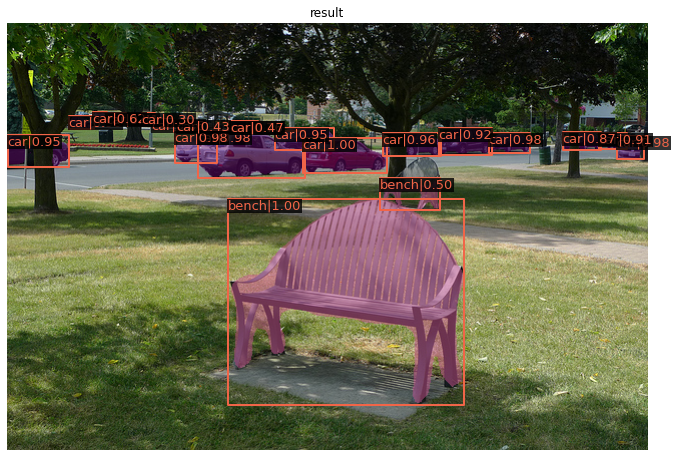

In [18]:
# Read inputImage and apply detector
inputImage = 'mmdetection/demo/demo.jpg'
result = inference_detector(detectorRSModel, inputImage)

# Show Result
show_result_pyplot(detectorRSModel, inputImage, result, score_thr=0.3)

## Raccoon Dataset
![Raccoon Dataset](https://i.imgur.com/cRQJ1PB.png)

Dataset URL : https://github.com/datitran/raccoon_dataset <br>
This dataset contains 196 images of raccoons and 213 bounding boxes (some images contain two raccoons). This is a single class problem, and images various size and scene condition. It's a great first dataset for getting started with object detection.



Download and extract preprocessed dataset from lab server

In [7]:
# !wget http://piclab.ai/classes/cv2020/raccoonsDataset.zip
# !unzip -q raccoonsDataset.zip

--2021-03-27 16:33:04--  http://piclab.ai/classes/cv2020/raccoonsDataset.zip
Resolving piclab.ai (piclab.ai)... 161.200.92.132
Connecting to piclab.ai (piclab.ai)|161.200.92.132|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://piclab.ai/classes/cv2020/raccoonsDataset.zip [following]
--2021-03-27 16:33:04--  https://piclab.ai/classes/cv2020/raccoonsDataset.zip
Connecting to piclab.ai (piclab.ai)|161.200.92.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7660917 (7.3M) [application/zip]
Saving to: ‘raccoonsDataset.zip’

raccoonsDataset.zip 100%[===================>]   7.31M  37.0MB/s    in 0.2s    

2021-03-27 16:33:05 (37.0 MB/s) - ‘raccoonsDataset.zip’ saved [7660917/7660917]



### Dataset Exploration
We will use pycocotools to explore this dataset. 

In [9]:
from pycocotools.coco import COCO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
trainLabelFile='raccoons/coco_annotations.json'
# initialize COCO api for instance annotations
trainCOCOBinding = COCO(trainLabelFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


COCO categories: 
raccoons raccoon

Image Data >> {'id': 130, 'license': 1, 'file_name': 'raccoon-177_jpg.rf.8c788d9a9fdd9e8cb17ccef7130b693b.jpg', 'height': 183, 'width': 276, 'date_captured': '2020-05-12T21:43:50+00:00'}
Box Data [{'id': 137, 'image_id': 130, 'category_id': 1, 'bbox': [8, 18, 149, 160], 'area': 23840, 'segmentation': [], 'iscrowd': 0}, {'id': 138, 'image_id': 130, 'category_id': 1, 'bbox': [146, 13, 117, 133], 'area': 15561, 'segmentation': [], 'iscrowd': 0}]


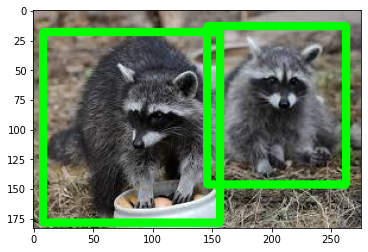

In [10]:
#display COCO categories and supercategories
cats = trainCOCOBinding.loadCats(trainCOCOBinding.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

# get all images containing given categories, select one at random
catIds = trainCOCOBinding.getCatIds(catNms=['raccoon']);
imgIds = trainCOCOBinding.getImgIds(catIds=catIds );

randomImgId = np.random.randint(0,len(imgIds))
sampleImageData = trainCOCOBinding.loadImgs(imgIds[randomImgId])[0]

print('Image Data >>', sampleImageData)

sampleImage = cv2.imread('raccoons/'+sampleImageData['file_name'])

annIds = trainCOCOBinding.getAnnIds(imgIds=randomImgId, catIds=catIds, iscrowd=None)
boxes = trainCOCOBinding.loadAnns(annIds)
print('Box Data', boxes)

for box in boxes:
  x,y,w,h = box['bbox']
  cv2.rectangle(sampleImage, (int(x), int(y)), (int(x+w), int(y+h)), (0,255,0), 5)

sampleImage = cv2.cvtColor(sampleImage, cv2.COLOR_BGR2RGB)

plt.imshow(sampleImage)
plt.show()

### Modify MMDetection model configuration

In [11]:
from mmcv import Config

# !wget -c https://www.piclab.ai/classes/cv2020/ssd300_raccoon.py \
#       -O mmdetection/configs/ssd/ssd300_raccoon.py

modelConfig = Config.fromfile('mmdetection/configs/ssd/ssd300_raccoon.py') 

# !mkdir checkpoints
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20200307-a92d2092.pth \
#       -O checkpoints/ssd300_coco_20200307-a92d2092.pth

print(f'Original Config:\n{modelConfig.pretty_text}')

--2021-03-27 16:33:13--  https://www.piclab.ai/classes/cv2020/ssd300_raccoon.py
Resolving www.piclab.ai (www.piclab.ai)... 161.200.92.132
Connecting to www.piclab.ai (www.piclab.ai)|161.200.92.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804 (1.8K) [application/octet-stream]
Saving to: ‘mmdetection/configs/ssd/ssd300_raccoon.py’

mmdetection/configs 100%[===================>]   1.76K  --.-KB/s    in 0s      

2021-03-27 16:33:13 (85.5 MB/s) - ‘mmdetection/configs/ssd/ssd300_raccoon.py’ saved [1804/1804]

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-03-27 16:33:13--  http://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20200307-a92d2092.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.85
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137237287 (131M) [application/octet-stream]
Saving to:

In [12]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
modelConfig.dataset_type = 'CocoDataset'
modelConfig.data_root = './raccoons'
modelConfig.classes = ('raccoon',)

modelConfig.data.train.type = 'CocoDataset'
modelConfig.data.train.classes = ('raccoon',)
modelConfig.data.train.data_root = './raccoons'
modelConfig.data.train.ann_file = 'coco_annotations.json'
modelConfig.data.train.img_prefix = ''

modelConfig.data.test.type = 'CocoDataset'
modelConfig.data.test.classes =('raccoon',)
modelConfig.data.test.data_root = './raccoons'
modelConfig.data.test.ann_file = 'coco_annotations.json'
modelConfig.data.test.img_prefix = ''

modelConfig.data.val.type = 'CocoDataset'
modelConfig.data.val.classes =('raccoon',)
modelConfig.data.val.data_root = './raccoons'
modelConfig.data.val.ann_file = 'coco_annotations.json'
modelConfig.data.val.img_prefix = ''

# Modify num classes of the model in box head
modelConfig.model.bbox_head.num_classes = 1

# use pretrained model as start point
modelConfig.load_from = 'checkpoints/ssd300_coco_20200307-a92d2092.pth'

# Set up working dir to save files and logs.
modelConfig.work_dir = './experiments'

modelConfig.optimizer.lr = 1e-3
modelConfig.lr_config.warmup = None
modelConfig.lr_config.policy = 'step'
modelConfig.lr_config.step = [5,10]
modelConfig.log_config.interval = 10

# Evaluation interval
modelConfig.evaluation.interval = 5
# Checkpoint saving interval
modelConfig.checkpoint_config.interval = 5
modelConfig.runner.max_epochs = 15

# Set seed thus the results are more reproducible
modelConfig.seed = 0
set_random_seed(0, deterministic=False)
modelConfig.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Modified Config:\n{modelConfig.pretty_text}')

Modified Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    pretrained='open-mmlab://vgg16_caffe',
    backbone=dict(
        type='SSDVGG',
        input_size=300,
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        l2_norm_scale=20),
    neck=None,
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=1,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[0.1, 0.1, 0.2, 0.2])),
    train_cfg=dict(
        assigner=dict(
            type='MaxIoUAs

### Training

In [13]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import mmcv
import os

# Build dataset
datasets = [build_dataset(modelConfig.data.train)]

# Build the detector
model = build_detector(modelConfig.model, train_cfg=modelConfig.get('train_cfg'), test_cfg=modelConfig.get('test_cfg'))

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(modelConfig.work_dir))
train_detector(model, datasets, modelConfig, distributed=False, validate=True)

2021-03-27 16:33:23,916 - mmdet - INFO - load model from: open-mmlab://vgg16_caffe
2021-03-27 16:33:23,916 - mmdet - INFO - Use load_from_openmmlab loader


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Downloading: "https://download.openmmlab.com/pretrain/third_party/vgg16_caffe-292e1171.pth" to /home/thanit456/.cache/torch/hub/checkpoints/vgg16_caffe-292e1171.pth
100.0%
2021-03-27 16:33:30,048 - mmdet - WARNING - The model and loaded state dict do not match exactly

missing keys in source state_dict: extra.0.weight, extra.0.bias, extra.1.weight, extra.1.bias, extra.2.weight, extra.2.bias, extra.3.weight, extra.3.bias, extra.4.weight, extra.4.bias, extra.5.weight, extra.5.bias, extra.6.weight, extra.6.bias, extra.7.weight, extra.7.bias, l2_norm.weight

2021-03-27 16:33:30,124 - mmdet - INFO - load checkpoint from checkpoints/ssd300_coco_20200307-a92d2092.pth
2021-03-27 16:33:30,124 - mmdet - INFO - Use load_from_local loader
2021-03-27 16:33:30,203 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.cls_convs.0.weight: copying a param with shape torch.Size([324, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([8,

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/home/thanit456/anaconda3/envs/human_seg/lib/python3.7/site-packages/mmdet/models/dense_heads/ssd_head.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  (labels < self.num_classes)).nonzero().reshape(-1)
2021-03-27 16:33:33,723 - mmdet - INFO - Epoch [1][10/50]	lr: 1.000e-03, eta: 0:04:15, time: 0.346, data_time: 0.225, memory: 1058, loss_cls: 6.7334, loss_bbox: 1.6818, loss: 8.4152
2021-03-27 16:33:35,009 - mmdet - INFO - Epoch [1][20/50]	lr: 1.000e-03, eta: 0:02:53, time: 0.129, data_time: 0.009, memory: 1058, loss_cls: 3.0694, loss_bbox: 2.4627, loss: 5.5321
2021-03-27 16:33:36,292 - mmdet - INFO - Epoch [1][30/50]	lr: 1.000e-03, eta: 0:02:24, time: 0.128, data_time: 0.009, memory: 1058, loss_cls: 2.8614, loss_bbox: 2.2213, loss: 5.0827
2021-03-27 16:33:37,564 - mmdet - INFO - Epoch [1][40/50]	lr: 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 196/196, 50.2 task/s, elapsed: 4s, ETA:     0s

2021-03-27 16:34:16,165 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.19s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.18s).
Accumulating evaluation results...


2021-03-27 16:34:17,931 - mmdet - INFO - Epoch(val) [5][50]	bbox_mAP: 0.3840, bbox_mAP_50: 0.8360, bbox_mAP_75: 0.3400, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.2530, bbox_mAP_l: 0.4030, bbox_mAP_copypaste: 0.384 0.836 0.340 -1.000 0.253 0.403


DONE (t=0.37s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.384
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.836
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.340
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.253
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.403
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.522
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.522
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.522
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.487
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.525


2021-03-27 16:34:21,285 - mmdet - INFO - Epoch [6][10/50]	lr: 1.000e-04, eta: 0:01:23, time: 0.329, data_time: 0.215, memory: 1058, loss_cls: 1.7052, loss_bbox: 0.7580, loss: 2.4632
2021-03-27 16:34:22,476 - mmdet - INFO - Epoch [6][20/50]	lr: 1.000e-04, eta: 0:01:20, time: 0.119, data_time: 0.009, memory: 1058, loss_cls: 1.5710, loss_bbox: 0.8506, loss: 2.4217
2021-03-27 16:34:23,667 - mmdet - INFO - Epoch [6][30/50]	lr: 1.000e-04, eta: 0:01:18, time: 0.119, data_time: 0.009, memory: 1058, loss_cls: 1.5498, loss_bbox: 0.7462, loss: 2.2960
2021-03-27 16:34:24,862 - mmdet - INFO - Epoch [6][40/50]	lr: 1.000e-04, eta: 0:01:15, time: 0.119, data_time: 0.009, memory: 1058, loss_cls: 1.6084, loss_bbox: 0.9057, loss: 2.5141
2021-03-27 16:34:26,052 - mmdet - INFO - Epoch [6][50/50]	lr: 1.000e-04, eta: 0:01:13, time: 0.119, data_time: 0.009, memory: 1058, loss_cls: 1.5400, loss_bbox: 0.8221, loss: 2.3620
2021-03-27 16:34:29,398 - mmdet - INFO - Epoch [7][10/50]	lr: 1.000e-04, eta: 0:01:13, tim

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 196/196, 52.4 task/s, elapsed: 4s, ETA:     0s

2021-03-27 16:35:03,223 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.21s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.16s).
Accumulating evaluation results...


2021-03-27 16:35:05,000 - mmdet - INFO - Epoch(val) [10][50]	bbox_mAP: 0.5890, bbox_mAP_50: 0.9460, bbox_mAP_75: 0.6950, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5140, bbox_mAP_l: 0.5970, bbox_mAP_copypaste: 0.589 0.946 0.695 -1.000 0.514 0.597


DONE (t=0.37s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.589
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.946
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.695
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.514
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.597
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.677
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.680
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.680
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.600
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.686


2021-03-27 16:35:08,361 - mmdet - INFO - Epoch [11][10/50]	lr: 1.000e-05, eta: 0:00:39, time: 0.330, data_time: 0.216, memory: 1058, loss_cls: 1.5043, loss_bbox: 0.6410, loss: 2.1453
2021-03-27 16:35:09,558 - mmdet - INFO - Epoch [11][20/50]	lr: 1.000e-05, eta: 0:00:37, time: 0.120, data_time: 0.009, memory: 1058, loss_cls: 1.3935, loss_bbox: 0.6150, loss: 2.0084
2021-03-27 16:35:10,755 - mmdet - INFO - Epoch [11][30/50]	lr: 1.000e-05, eta: 0:00:36, time: 0.120, data_time: 0.009, memory: 1058, loss_cls: 1.3631, loss_bbox: 0.4834, loss: 1.8465
2021-03-27 16:35:11,950 - mmdet - INFO - Epoch [11][40/50]	lr: 1.000e-05, eta: 0:00:34, time: 0.120, data_time: 0.009, memory: 1058, loss_cls: 1.5393, loss_bbox: 0.6236, loss: 2.1630
2021-03-27 16:35:13,142 - mmdet - INFO - Epoch [11][50/50]	lr: 1.000e-05, eta: 0:00:32, time: 0.119, data_time: 0.008, memory: 1058, loss_cls: 1.2902, loss_bbox: 0.5011, loss: 1.7913
2021-03-27 16:35:16,506 - mmdet - INFO - Epoch [12][10/50]	lr: 1.000e-05, eta: 0:00:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 196/196, 52.2 task/s, elapsed: 4s, ETA:     0s

2021-03-27 16:35:50,322 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.17s).
Accumulating evaluation results...


2021-03-27 16:35:52,094 - mmdet - INFO - Epoch(val) [15][50]	bbox_mAP: 0.5920, bbox_mAP_50: 0.9420, bbox_mAP_75: 0.7070, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5290, bbox_mAP_l: 0.6010, bbox_mAP_copypaste: 0.592 0.942 0.707 -1.000 0.529 0.601


DONE (t=0.37s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.592
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.942
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.707
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.529
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.601
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.682
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.682
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.682
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.600
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.688


### Inference on image!

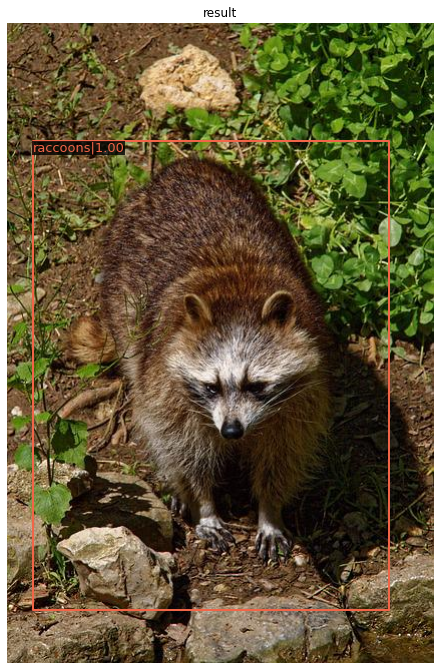

In [14]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
inputImage = mmcv.imread('raccoons/raccoon-115_jpg.rf.9723b0a68ad8ed8bdb5ccf6a210ba09b.jpg')

model.cfg = modelConfig
model.CLASSES = ('raccoons',)

result = inference_detector(model, inputImage)
show_result_pyplot(model, inputImage, result)

2021-03-29 00:55:01,911 - mmdet - INFO - Use load_from_torchvision loader
2021-03-29 00:55:02,106 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

missing keys in source state_dict: layer2.0.conv2.weight_diff, layer2.0.conv2.switch.weight, layer2.0.conv2.switch.bias, layer2.0.conv2.pre_context.weight, layer2.0.conv2.pre_context.bias, layer2.0.conv2.post_context.weight, layer2.0.conv2.post_context.bias, layer2.0.conv2.offset_s.weight, layer2.0.conv2.offset_s.bias, layer2.0.conv2.offset_l.weight, layer2.0.conv2.offset_l.bias, layer2.0.rfp_conv.weight, layer2.0.rfp_conv.bias, layer2.1.conv2.weight_diff, layer2.1.conv2.switch.weight, layer2.1.conv2.switch.bias, layer2.1.conv2.pre_context.weight, layer2.1.conv2.pre_context.bias, layer2.1.conv2.post_context.weight, layer2.1.conv2.post_context.bias, layer2.1.conv2.offset_s.weight, layer2.1.conv2.offset_s.bias, layer2.1.conv2.offset_l.weight, layer2.1.conv2.offse

Use load_from_local loader


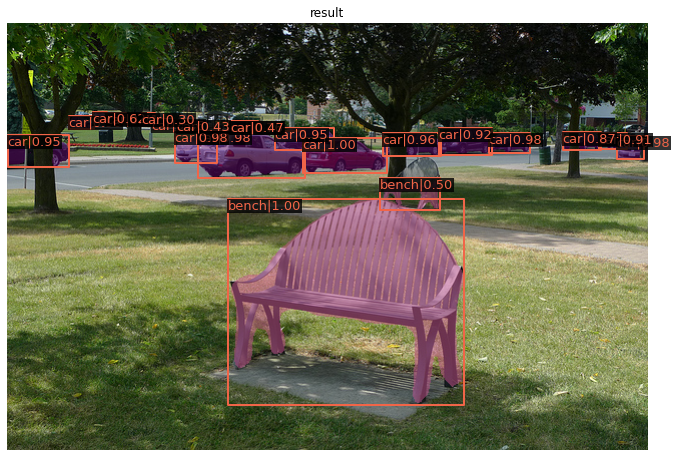

In [23]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Read DetectoRS config file
config = 'mmdetection/configs/detectors/detectors_htc_r50_1x_coco.py'

# DetectoRS pretrained on COCO dataset
checkpoint = 'checkpoints/detectors_htc_r50_1x_coco-329b1453.pth'

# initialize the detector
detectorRSModel = init_detector(config, checkpoint, device='cuda')

# Read inputImage and apply detector
inputImage = 'mmdetection/demo/demo.jpg'
result = inference_detector(detectorRSModel, inputImage)

# Show Result
show_result_pyplot(detectorRSModel, inputImage, result, score_thr=0.3)

In [25]:
len(result[0])

80

In [26]:
len(result[1])

80

In [29]:
result[0][0].shape

(6, 5)

In [37]:
result[0][0]

array([[2.5367017e+02, 1.0416159e+02, 2.6246835e+02, 1.1301621e+02,
        5.8693852e-02],
       [3.6055148e+02, 1.0861787e+02, 3.6787674e+02, 1.1963739e+02,
        5.3931128e-02],
       [2.4153107e+02, 1.1463704e+02, 2.5393529e+02, 1.2586401e+02,
        2.7246784e-02],
       [5.3316327e+02, 1.0854104e+02, 5.4106158e+02, 1.2586162e+02,
        2.2715844e-02],
       [6.2692053e+02, 1.0317009e+02, 6.3641870e+02, 1.1229563e+02,
        1.6080378e-02],
       [6.1137634e+02, 1.1419811e+02, 6.2493787e+02, 1.2401851e+02,
        9.9511072e-03]], dtype=float32)

In [31]:
result[0][1]

array([], shape=(0, 5), dtype=float32)

In [33]:
len(result[1][0])

6

In [34]:
result[1][0][0].shape

(427, 640)

In [ ]:
detectorRSModel.CLASSES

In [49]:
bench_idx = detectorRSModel.CLASSES.index('bench')
len(result[1][bench_idx])

7

In [53]:
result[0][bench_idx][1]

array([[2.20161942e+02, 1.76924561e+02, 4.56976013e+02, 3.82309509e+02,
        9.96668994e-01],
       [3.72334534e+02, 1.55810089e+02, 4.32088501e+02, 1.87919174e+02,
        5.02930880e-01],
       [5.03050385e+01, 1.10840622e+02, 7.22382507e+01, 1.18614647e+02,
        2.31312484e-01],
       [9.14370575e+01, 1.06546761e+02, 1.06430054e+02, 1.20503227e+02,
        3.50328237e-02],
       [5.22120056e+01, 1.05076447e+02, 1.13636024e+02, 1.20512833e+02,
        2.61146873e-02],
       [4.97643585e+01, 9.94456329e+01, 1.45403595e+02, 1.25490410e+02,
        1.62209235e-02],
       [5.96896477e+01, 1.19460861e+02, 1.48805527e+02, 1.29380066e+02,
        1.47856539e-02]], dtype=float32)

In [71]:
import cv2 
import matplotlib.pyplot as plt 

img = cv2.cvtColor(cv2.imread(inputImage), cv2.COLOR_BGR2RGB)
img.shape

(427, 640, 3)

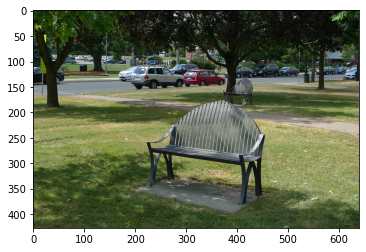

In [72]:
plt.imshow(img)
plt.show()

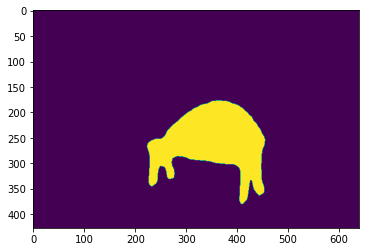

In [73]:
plt.imshow(result[1][bench_idx][0])
plt.show()

In [86]:
# import os 
# import glob 
# from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# # Read DetectoRS config file
# config = 'mmdetection/configs/detectors/detectors_htc_r50_1x_coco.py'

# # DetectoRS pretrained on COCO dataset
# checkpoint = 'checkpoints/detectors_htc_r50_1x_coco-329b1453.pth'

# # initialize the detector
# model = init_detector(config, checkpoint, device='cuda')

# person_idx = model.CLASSES.index('person')

# for img_path in glob.glob('./dataset/*')[:3]:
#     img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.show()
    
#     result = inference_detector(detectorRSModel, img_path)
#     mask = result[1][person_idx][0]
#     plt.imshow(mask)
#     plt.show()
    
#     cropped_img = cv2.bitwise_and(img, img, mask=mask.astype(np.uint8))
#     plt.imshow(cropped_img)
#     plt.show()
#     print('-' * 50)